In [18]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
#Set current directory and work relative to it
os.chdir('../Data Files')

In [20]:
#Load the dataset into a pandas.DataFrame
ibm_df = pd.read_csv('ibm-common-stock-closing-prices.csv')
ibm_df.index = ibm_df['Date']

In [21]:
#Let's find out the shape of the DataFrame
print('Shape of the dataframe:', ibm_df.shape)

Shape of the dataframe: (1009, 2)


In [22]:
#Let's see the top 10 rows
ibm_df.head(10)

,Date,IBM common stock closing prices
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50
1962-01-09,1962-01-09,556.00
1962-01-10,1962-01-10,557.00
1962-01-11,1962-01-11,563.00
1962-01-12,1962-01-12,564.00


In [23]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Close_Price
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


In [24]:
#remove missing values
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


In [25]:
#To illustrate the idea of moving average we compute a weekly moving average taking
#a window of 5 days instead of 7 days because trading happens only during the weekdays.
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

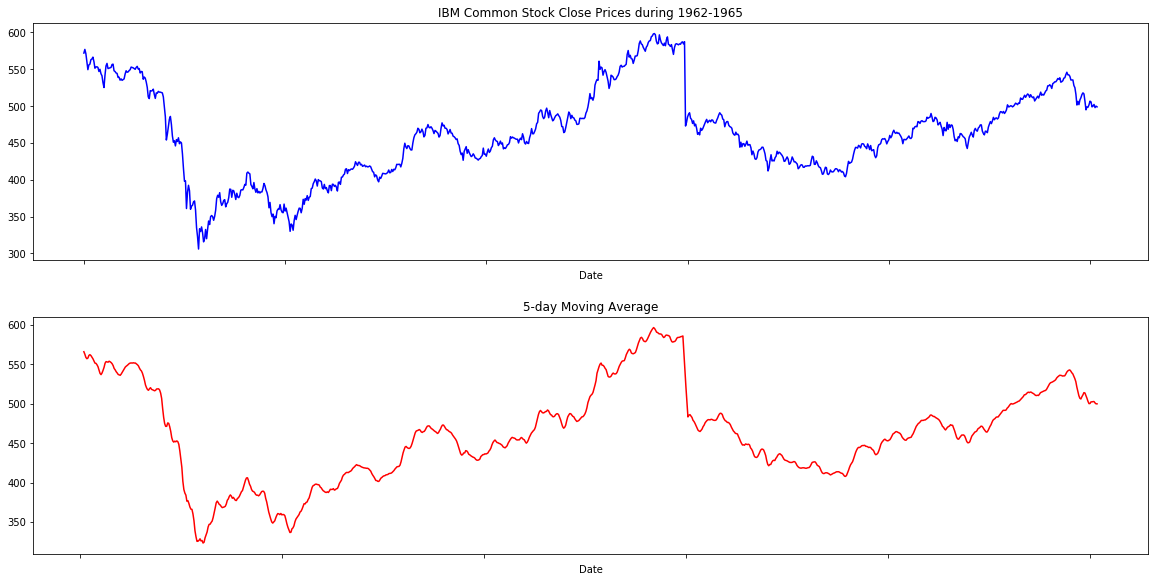

In [26]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('../plots/ch2/B07887_02_14.png', format='png', dpi=300)

In [27]:
#Calculate the moving averages using 'rolling' and 'mean' functions
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [28]:
#Let's remove NaN from the above variables
MA2 = MA2.loc[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.loc[~pd.isnull(TwoXMA2)]

MA4 = MA4.loc[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

MA3 = MA3.loc[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.loc[~pd.isnull(ThreeXMA3)]

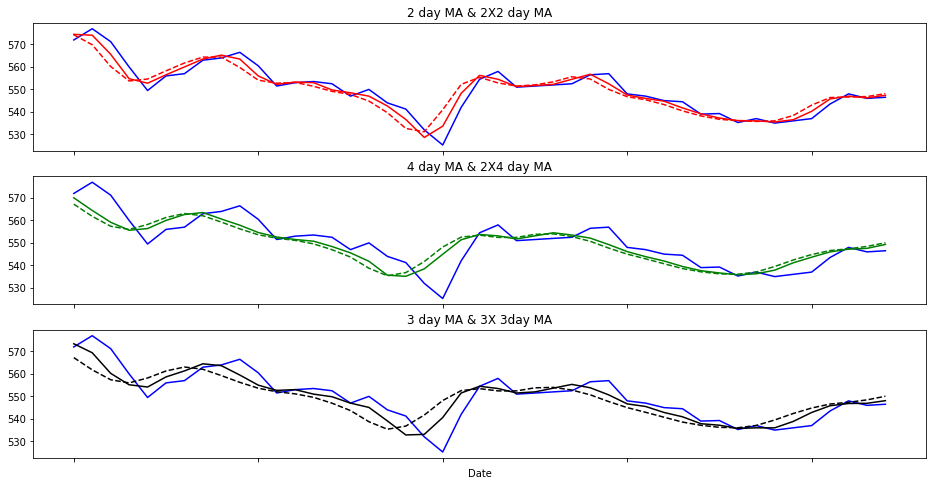

In [29]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(16, 8)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')
plt.savefig('../plots/ch2/B07887_02_15.png', format='png', dpi=300)

\begin{equation}
\hat{F}_t=\frac{x_{t-k} + x_{t-k+1}+...+x_{t}+..+x_{t+k-1} + x_{t+k}}{2k+1}
\end{equation}

\begin{equation}
\hat{F}^{(2)}_t=\frac{x_{t-1} +x_{t}}{2}
\end{equation}

\begin{equation}
2x\hat{F}^{(2)}_t=\frac{\hat{F}^{(2)}_t + \hat{F}^{(2)}_{t+1}}{2} = \frac{1}{2}[\frac{x_{t-1}+x_t}{2} + \frac{x_t + x_{t+1}}{2}] = \frac{1}{4}x_{t-2} + \frac{1}{2}x_t + \frac{1}{4}x_{t+1}
\end{equation}